# How Much of the World Has Access to the Internet?

![my image caption](1.jpeg)


## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

In [180]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Read the data
broadband = pd.read_csv('data/broadband.csv')

# Take a look at the first rows
broadband

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804
...,...,...,...,...
3883,Zimbabwe,ZWE,2016,1.217633
3884,Zimbabwe,ZWE,2017,1.315694
3885,Zimbabwe,ZWE,2018,1.406322
3886,Zimbabwe,ZWE,2019,1.395818


In [181]:
# Read the internet table
internet = pd.read_csv('data/internet.csv')

# Take a look at the first rows
internet

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [182]:
# Read the people table
people = pd.read_csv('data/people.csv')
people

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


### Before answering these questions, we will conduct several standard studies of our data. Let's see how many missing values and look at the data types.

In [183]:
people.drop_duplicates()
internet.drop_duplicates()
broadband.drop_duplicates()

print(broadband.info())
print(people.info())
print(internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   3888 non-null   object 
 1   Code                     3617 non-null   object 
 2   Year                     3888 non-null   int64  
 3   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 121.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column     

In [184]:
print(broadband.describe())
print(people.describe())
print(internet.describe())

              Year  Broadband_Subscriptions
count  3888.000000              3888.000000
mean   2011.108539                10.147989
std       5.618481                12.617045
min    1998.000000                 0.000000
25%    2007.000000                 0.279275
50%    2011.000000                 3.799865
75%    2016.000000                17.749008
max    2020.000000                78.524361
              Year         Users
count  6379.000000  6.379000e+03
mean   2004.733344  2.787634e+07
std       8.849845  1.834876e+08
min    1990.000000  0.000000e+00
25%    1997.000000  9.176000e+03
50%    2005.000000  2.282750e+05
75%    2012.000000  3.520350e+06
max    2020.000000  4.699888e+09
              Year  Internet_Usage
count  7089.000000     7089.000000
mean   2003.858936       20.969479
std       8.339364       27.488015
min    1990.000000        0.000000
25%    1997.000000        0.158150
50%    2004.000000        6.000000
75%    2011.000000       36.000000
max    2019.000000       99

In [185]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (from {} lines)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=17)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold


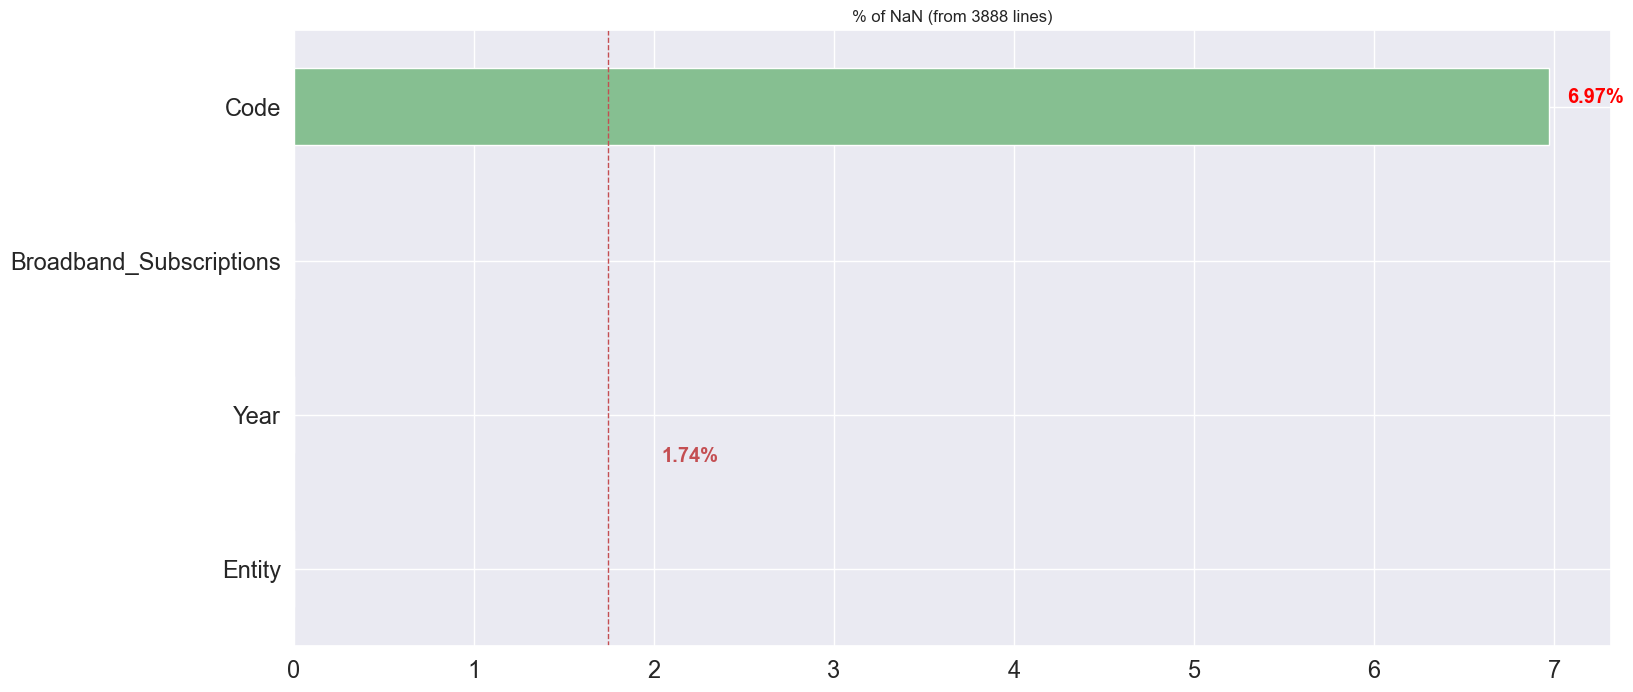

In [186]:
plot, threshold = percent_hbar(broadband)


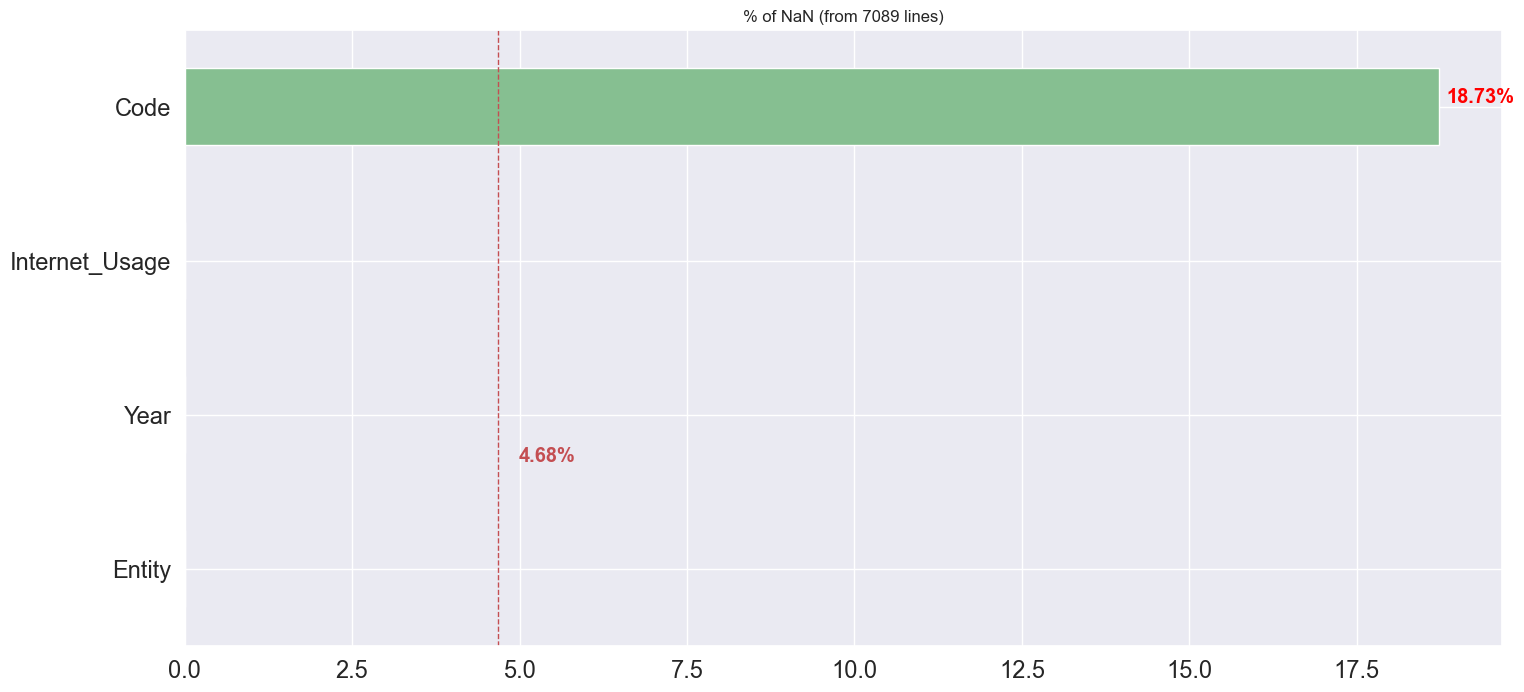

In [187]:
plot, threshold = percent_hbar(internet)


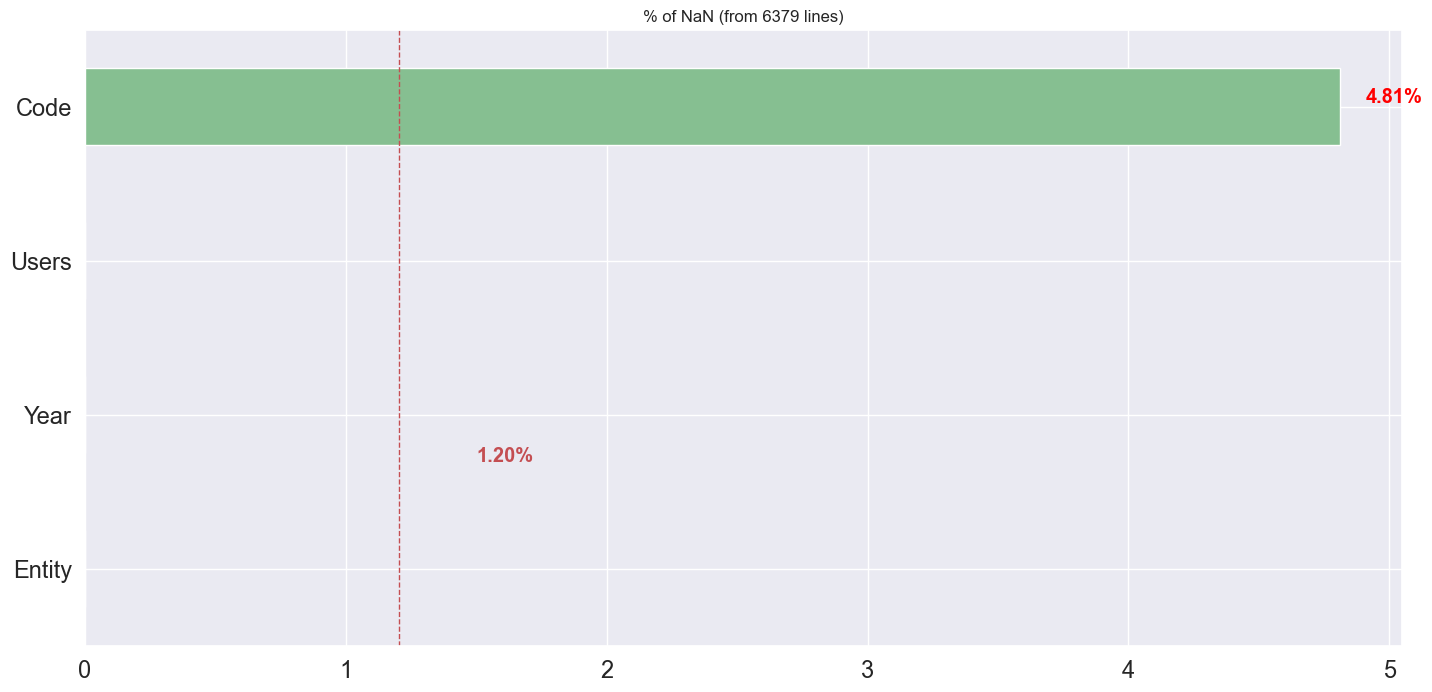

In [188]:
plot, threshold = percent_hbar(people)


In [189]:
people[people['Code'].isna()].head()

,Entity,Code,Year,Users
26,Africa,NaN,1990,0
27,Africa,NaN,1991,5434
28,Africa,NaN,1992,16232
29,Africa,NaN,1993,48970
30,Africa,NaN,1994,112387


After viewing the data, we can say that the missing values are continents, a description of groups of countries, and the like. Therefore, these values do not have special codes.

## Let's move on to the answers to the questions posed.

### What are the top 5 countries with the highest internet use (by population share)?

In [190]:
first_question = internet.query('Year==2019 and Internet_Usage>=90').sort_values('Internet_Usage')
first_question.tail()

,Entity,Code,Year,Internet_Usage
1552,Denmark,DNK,2019,98.046435
6716,United Arab Emirates,ARE,2019,99.149998
3416,Kuwait,KWT,2019,99.542676
5388,Qatar,QAT,2019,99.652804
470,Bahrain,BHR,2019,99.701504


In [191]:
def barplot_best_5(df,X,Y,xlabel,ylabel,N,title):
	n = list(df[X])
	s = list(df[Y].astype(int))
	plt.figure(figsize=(12, 4))
	plt.xticks(rotation=75, fontsize=12); 
	ax = plt.bar(n,s)
	plt.title(title,fontsize=15)

	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	for i in range(len(s)):
		plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')
	for i in range(len(s)-N,len(s)):
		ax.patches[i].set_facecolor('#aa3333')
	plt.show()


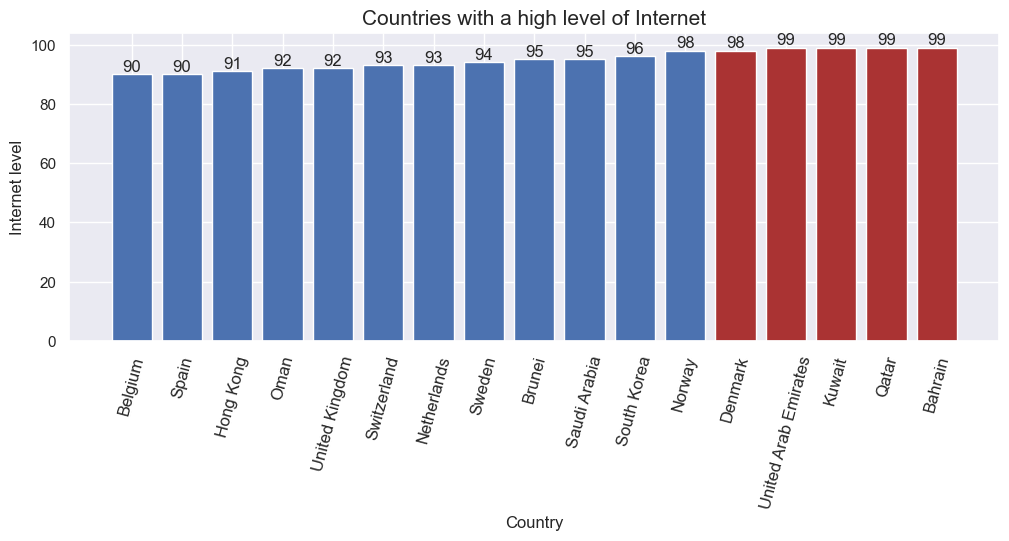

In [192]:
barplot_best_5(first_question,'Entity','Internet_Usage','Country','Internet level',5,'Countries with a high level of Internet')


### I would look at how the data has changed over the past three years for a better understanding

In [193]:
f_q_1 = internet.query('Year>=2017 and Internet_Usage>=90')\
				.groupby(['Entity'])\
    			.agg({'Internet_Usage':'mean'})\
        		.sort_values('Internet_Usage')\
				.reset_index()



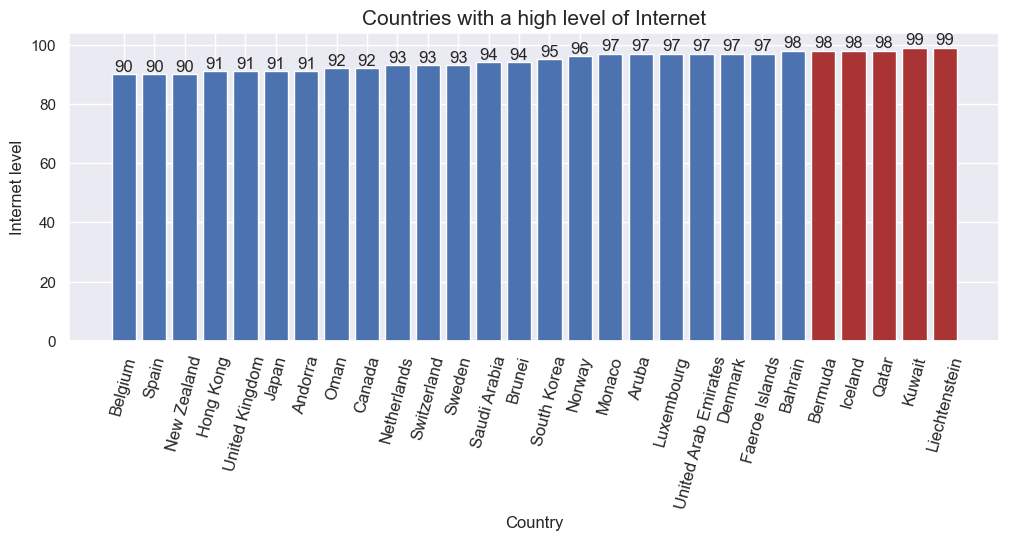

In [194]:
barplot_best_5(f_q_1,'Entity','Internet_Usage','Country','Internet level',5,'Countries with a high level of Internet')


### On barplot, we have built a dependency between countries and a high level of Internet. We highlighted the five most developed countries in red.

It's time to answer the second question.
### How many people had internet access in those countries in 2019?


In [195]:

top_country = list(first_question.tail()['Entity'])
second_question = people[(people['Entity'].isin(top_country))&(people['Year']== 2019)].sort_values('Users')


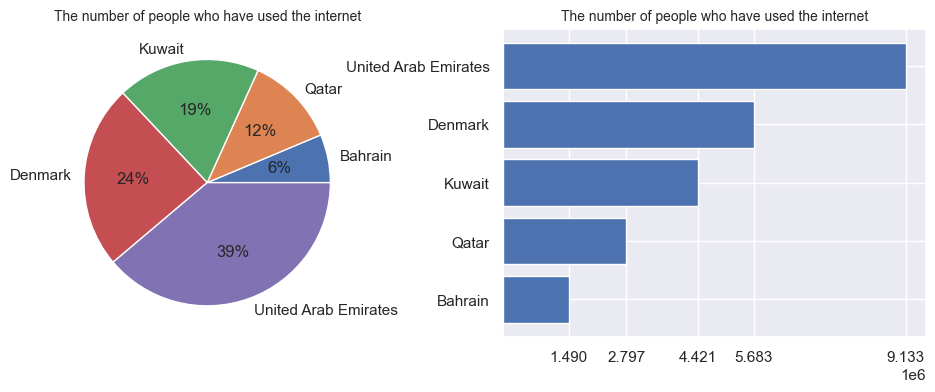

In [196]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))

plt.barh(list(second_question['Entity']),list(second_question['Users']))
ax1.pie(x=second_question['Users'], autopct="%.f%%",labels =second_question['Entity']);
ax1.set_title("The number of people who have used the internet", fontsize=10,loc = 'center');
plt.title("The number of people who have used the internet", fontsize=10,loc = 'center')
plt.xticks(list(second_question['Users']))

plt.show()

We see that the UAE is the leader in the number of people who have a high level of Internet, there are more than 9 million people in it. Next comes Denmark with a population of more than 5.5 million.

It's time to answer the third question.
### What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?

## Since our data does not have a comparison of the necessary regions with the countries that are included in them, we will upload this data from third-party sources.

I have created lists with the names of countries that are included in these regions and why we will answer this question through the function and search through these list.
### I still have a misunderstanding of the regions, since the Caribbean region includes what is included in North America, so there is an overlap of countries (According to the website https://worldpopulationreview.com / ) Because of this, we may have the presence of the same countries in several lists.

In [197]:

Africa_Eastern_and_Southern = ['Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Mozambique','Malawi','Mauritius','Rwanda','Seychelles','Somalia','South Sudan','Tanzania','Uganda','Zambia','Zimbabwe','Botswana','Eswatini','Lesotho','Namibia','South Africa']

Africa_Western_and_Central = ['Angola','Cameroon','Central African Republic','Chad','Congo','DR Congo','Equatorial Guinea','Gabon','Sao Tome and Principe','Benin','Burkina Faso','Cabo Verde','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Sierra Leone','Togo']

Latin_America_and_Caribbean = ['Argentina','Aruba','Belize','Bolivia','Brazil','Chile','Colombia','Costa Rica','Cuba','Curaçao','Dominican Republic','Ecuador','Salvador','Falkland Islands','French Guiana','Guatemala','Guyana','Haiti','Honduras','Mexico','Nicaragua','Panama','Paraguay','Peru','Saint Martin','Sint Maarten','South Georgia and the South Sandwich Islands','Suriname','Trinidad and Tobago','Uruguay','Venezuela']

East_Asia= ['China','Japan','South Korea','North Korea', 'Taiwan','Hong Kong','Mongolia','Macao',]
Pacific = 'American Samoa,Australia,Cook Islands,Fiji,French Polynesia,Guam,Kiribati,Marshall Islands,Micronesia (country),Nauru,New Caledonia,New Zealand,Niue,Northern Mariana Islands,Palau,Papua New Guinea,Samoa,Solomon Islands,Tonga,Tuvalu,Vanuatu'
Pacific = Pacific.split(',')
East_Asia_and_Pacific = East_Asia+Pacific

South_Asia = ['India','Bangladesh','Bhutan','Maldives','Nepal','Pakistan','Sri Lanka','Afghanistan']

European_Union ='Austria	France	Malta	Belgium	Germany	Netherlands	Bulgaria	Greece	Poland	Croatia	Hungary	Portugal	Cyprus	Ireland	Romania	Czech Republic	Italy	Slovakia	Denmark	Latvia	Slovenia	Estonia	Lithuania	Spain	Finland	Luxembourg	Sweden'
European_Union = European_Union.split('\t')

North_America = 'United States  Mexico  Canada  Guatemala  Haiti  Dominican Republic  Cuba  Honduras  Nicaragua  El Salvador  Costa Rica  Panama  Jamaica  Trinidad and Tobago  Bahamas  Belize  Barbados  Saint Lucia  Grenada  Saint Vincent and the Grenadines  Antigua and Barbuda  Dominica  Saint Kitts and Nevis'
North_America = North_America.split('  ')


In [198]:
def first_country(df,col1,pattern,col2,year,sort,n):
    first_country = df[(df[col1].isin(pattern))&(df[col2]>=year)]\
    				.groupby(col1).agg({sort:'mean'})\
    				.sort_values(sort,ascending = False)\
    				.reset_index()
    first_country[sort]=first_country[sort].round(3)
    return first_country.head(n)

Since there is no data for all countries in 2019, I will use the average value of Internet usage over the past few years

In [199]:

Eastern_and_Southern_Africa= first_country(internet,'Entity',Africa_Eastern_and_Southern,'Year',2017,'Internet_Usage',5)
Eastern_and_Southern_Africa


,Entity,Internet_Usage
0,Mauritius,59.333
1,Seychelles,58.770
2,South Africa,56.167
3,Djibouti,55.681
4,Botswana,41.414


In [200]:
Western_and_Central_Africa= first_country(internet,'Entity',Africa_Western_and_Central,'Year',2017,'Internet_Usage',5)
Western_and_Central_Africa

,Entity,Internet_Usage
0,Gabon,50.320
1,Ghana,37.884
2,Sao Tome and Principe,29.931
3,Senegal,29.643
4,Equatorial Guinea,26.240


In [201]:
Latin_America_and_Carib= first_country(internet,'Entity',Latin_America_and_Caribbean,'Year',2017,'Internet_Usage',5)
Latin_America_and_Carib

,Entity,Internet_Usage
0,Aruba,97.170
1,Chile,82.327
2,Trinidad and Tobago,77.326
3,Costa Rica,75.421
4,Argentina,74.295


In [202]:
East_Asia_and_Pacific_= first_country(internet,'Entity',East_Asia_and_Pacific,'Year',2017,'Internet_Usage',5)
East_Asia_and_Pacific_

,Entity,Internet_Usage
0,South Korea,95.750
1,Japan,91.504
2,New Zealand,90.811
3,Hong Kong,90.556
4,Australia,86.545


In [203]:
South_Asia_= first_country(internet,'Entity',South_Asia,'Year',2017,'Internet_Usage',5)
South_Asia_

,Entity,Internet_Usage
0,Maldives,63.186
1,Sri Lanka,34.113
2,India,32.000
3,Nepal,21.404
4,Pakistan,17.088


In [204]:
North_America_= first_country(internet,'Entity',North_America,'Year',2017,'Internet_Usage',5)
North_America_

,Entity,Internet_Usage
0,Canada,92.701
1,United States,87.887
2,Bahamas,85.000
3,Barbados,81.761
4,Saint Kitts and Nevis,80.710


In [205]:
European_Union_= first_country(internet,'Entity',European_Union,'Year',2019,'Internet_Usage',5)
European_Union_

,Entity,Internet_Usage
0,Denmark,98.046
1,Sweden,94.493
2,Netherlands,93.289
3,Spain,90.719
4,Belgium,90.371


### Let's answer the 4th question and build graphs of how Internet usage has been flowing in these regions over time.

In [206]:
def plot_usage_internet(list_,df,col,x,y,title):
    data = df[df[col].isin(list_[col])]
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=data,hue = col,x =x,y= y)
    plt.title(title,fontsize=15)

    plt.xticks(range(1989,2021,2),rotation=75,fontsize=12);



    

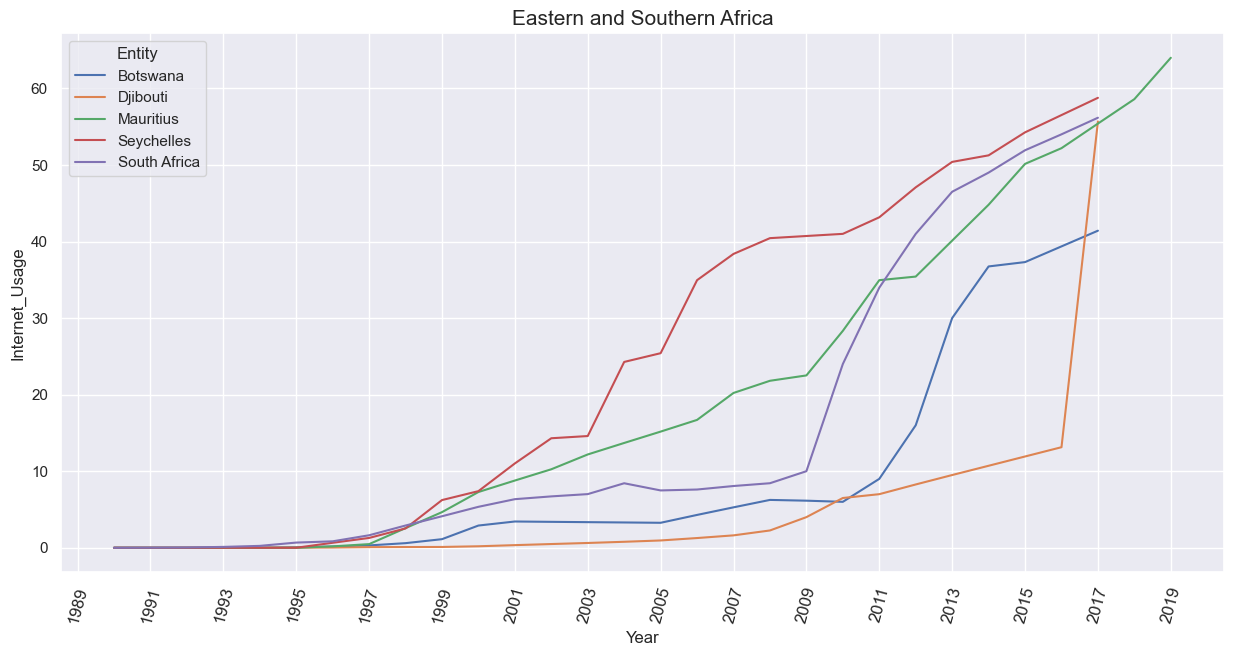

In [207]:
plot_usage_internet(Eastern_and_Southern_Africa,internet,'Entity','Year','Internet_Usage','Eastern and Southern Africa')

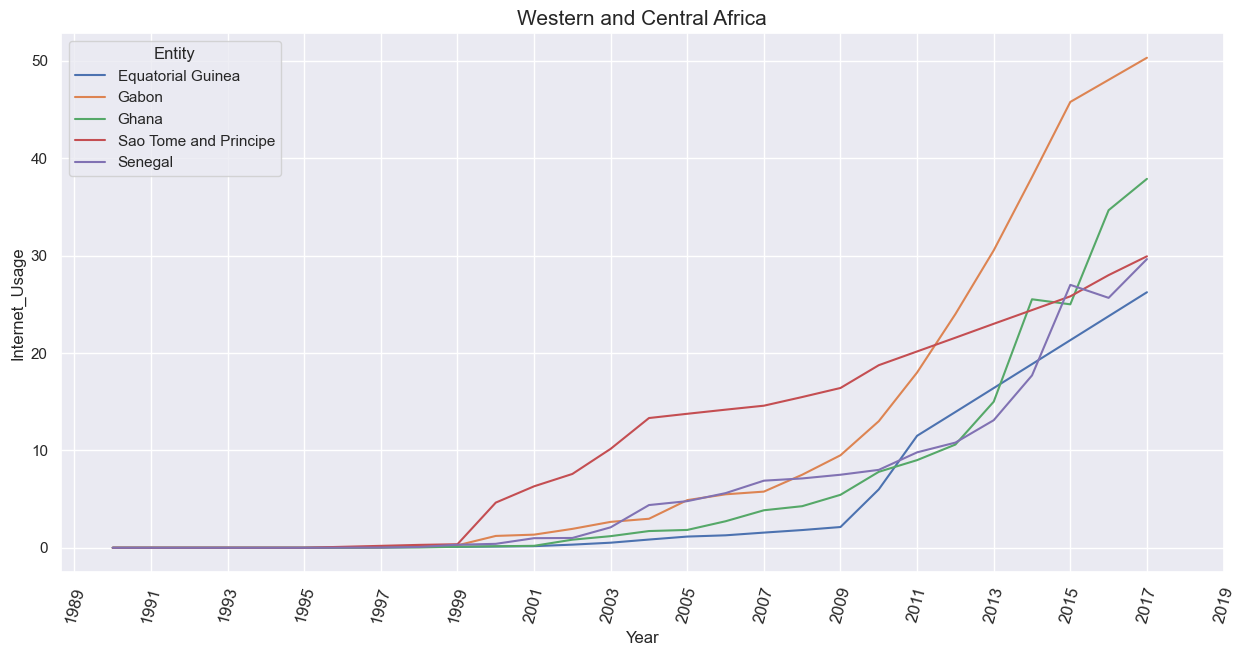

In [208]:
plot_usage_internet(Western_and_Central_Africa,internet,'Entity','Year','Internet_Usage','Western and Central Africa')


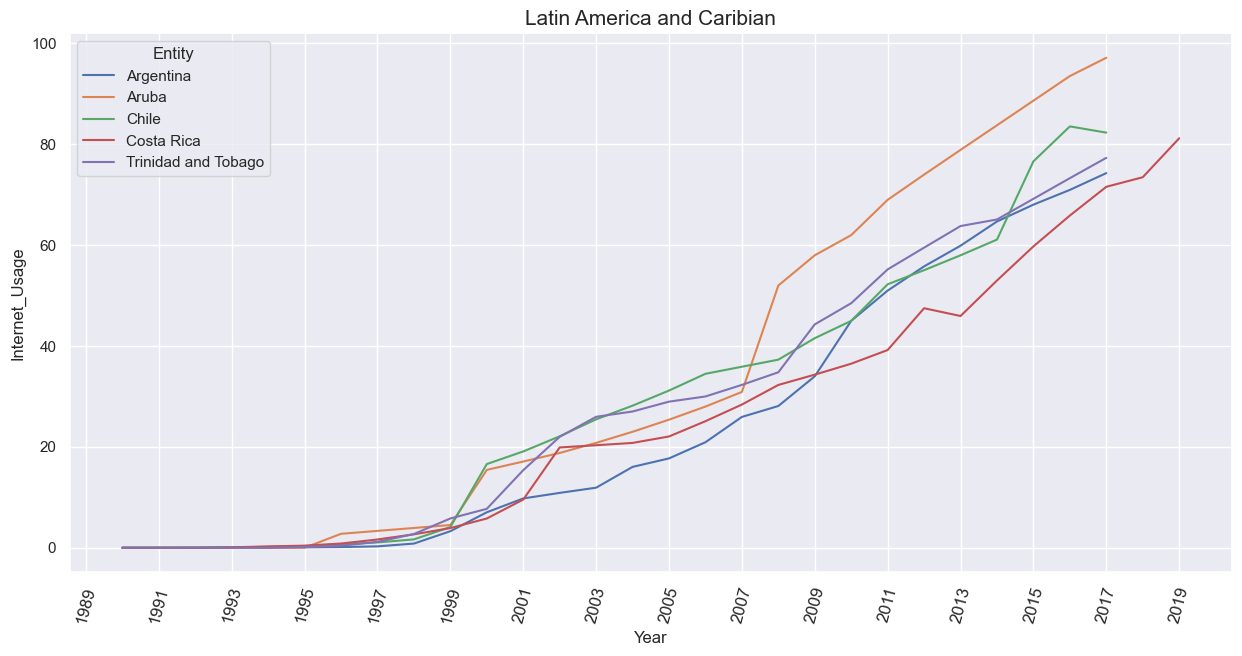

In [209]:
plot_usage_internet(Latin_America_and_Carib,internet,'Entity','Year','Internet_Usage','Latin America and Caribian')

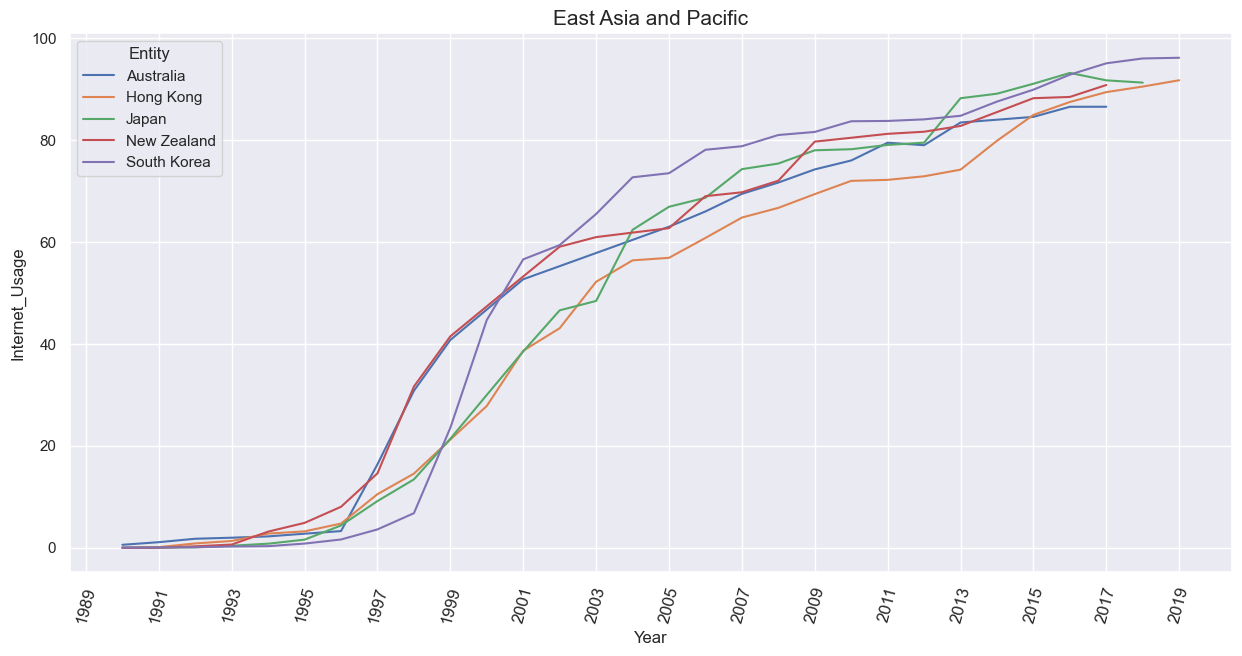

In [210]:
plot_usage_internet(East_Asia_and_Pacific_,internet,'Entity','Year','Internet_Usage','East Asia and Pacific')

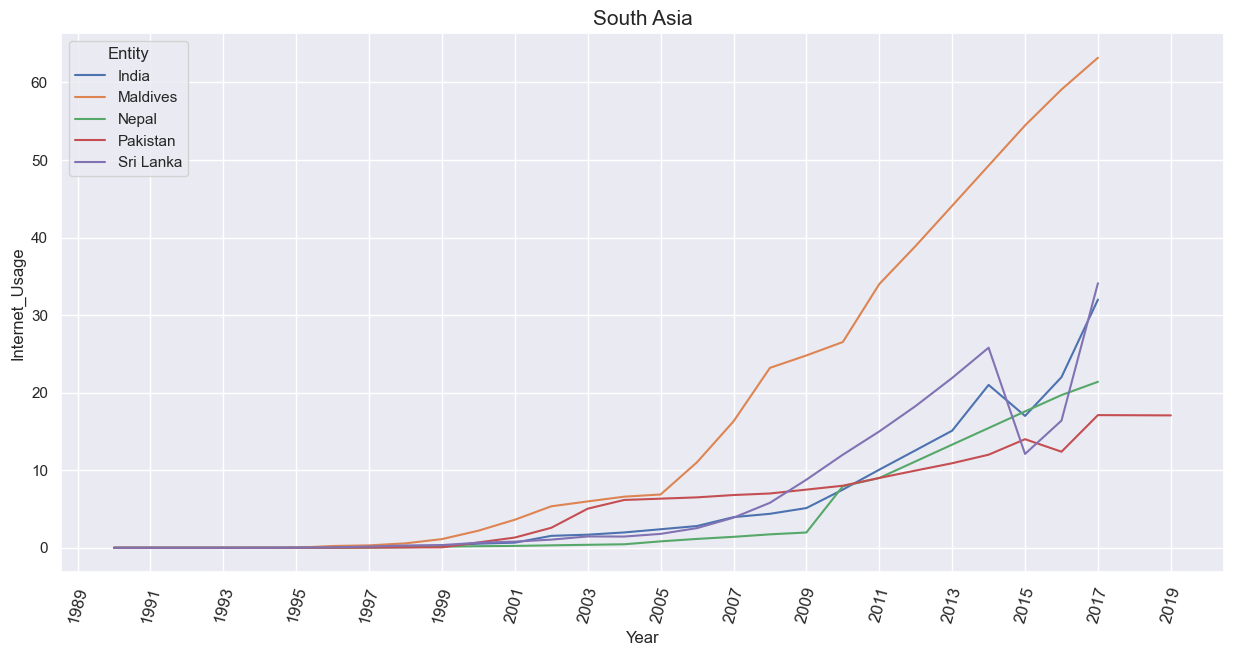

In [211]:
plot_usage_internet(South_Asia_,internet,'Entity','Year','Internet_Usage','South Asia')

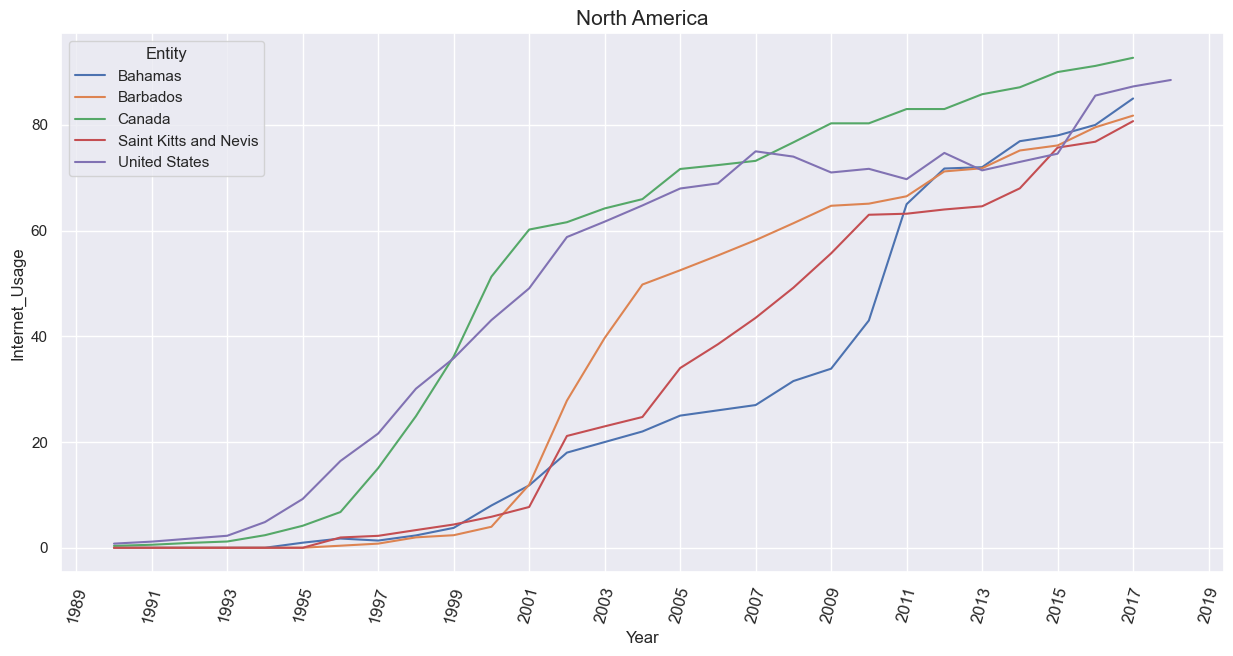

In [212]:
plot_usage_internet(North_America_,internet,'Entity','Year','Internet_Usage','North America')

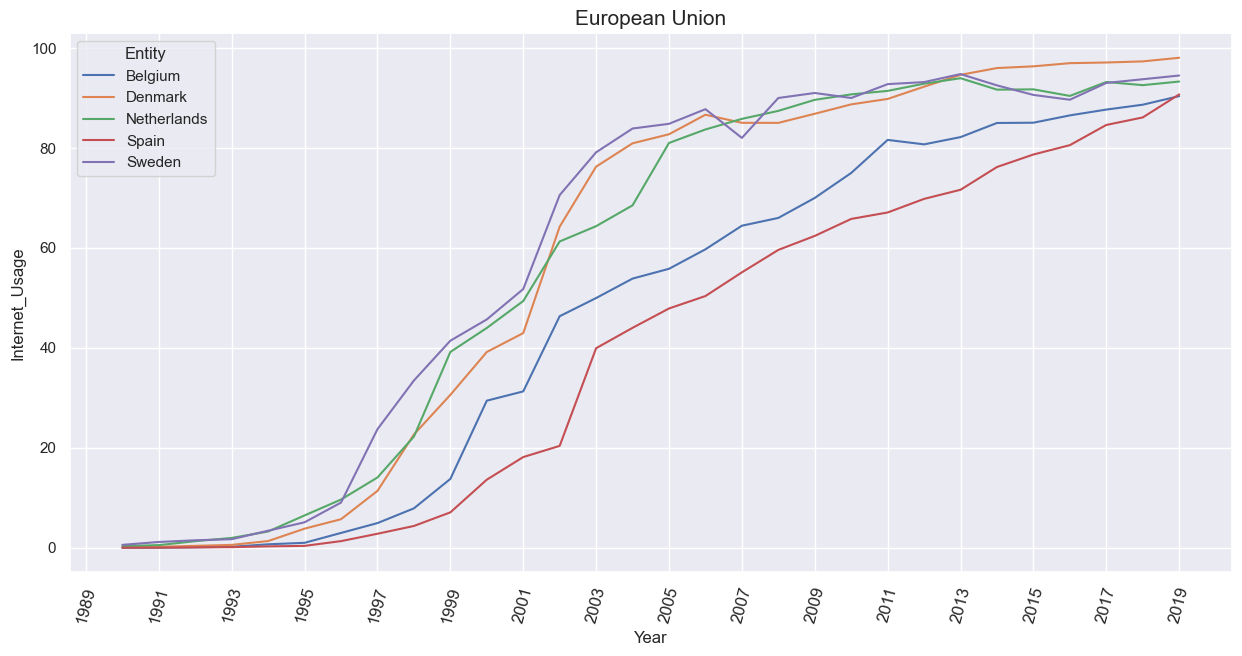

In [213]:
plot_usage_internet(European_Union_,internet,'Entity','Year','Internet_Usage','European Union')

### 5. What are the 5 countries with the most internet users?


In [214]:
people1 = people.dropna()

In [215]:
max_user = people1[people1['Year']>=2020].sort_values('Users',ascending = True)[0:-1].tail(10)
max_user

,Entity,Code,Year,Users
2191,Germany,DEU,2020,74840220
1717,Egypt,EGY,2020,77282687
3771,Mexico,MEX,2020,90678697
2939,Japan,JPN,2020,112995146
4791,Russia,RUS,2020,123766963
2730,Indonesia,IDN,2020,146059763
834,Brazil,BRA,2020,173419624
6049,United States,USA,2020,305371298
2699,India,IND,2020,600446441
1231,China,CHN,2020,1003218650


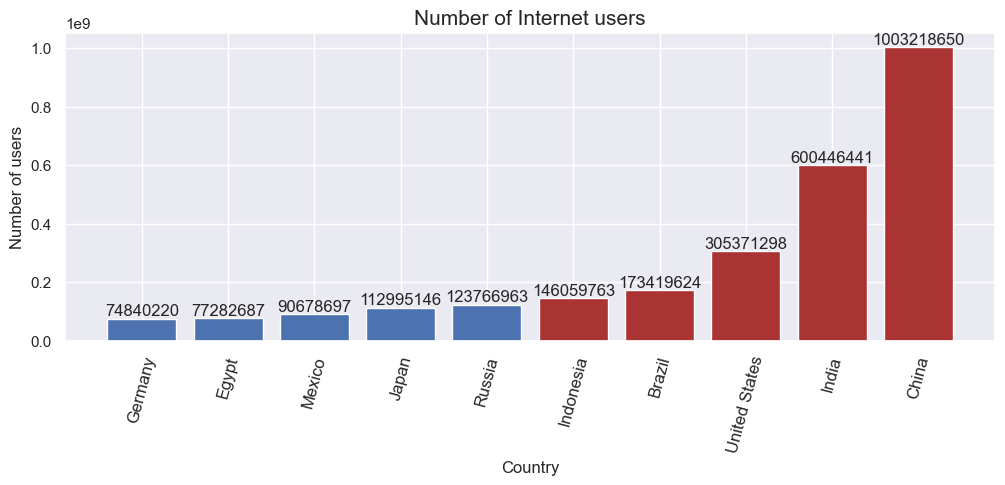

In [216]:
barplot_best_5(max_user,'Entity','Users','Country','Number of users',5,'Number of Internet users')


### 6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?


In [217]:
subscription_2019 = broadband[broadband['Year']==2019]
internet_2019 = internet[internet['Year']==2019][['Entity','Internet_Usage']]

In [218]:
corr_df =pd.merge(subscription_2019,internet_2019, how='inner',on="Entity")[['Entity','Broadband_Subscriptions','Internet_Usage']]
corr_df

,Entity,Broadband_Subscriptions,Internet_Usage
0,Albania,15.140735,69.642855
1,Austria,28.128099,87.752205
2,Bahrain,8.590934,99.701504
3,Belarus,34.011101,82.789152
4,Belgium,39.783138,90.370513
...,...,...,...
65,Turkey,17.058664,73.976704
66,United Arab Emirates,31.174944,99.149998
67,United Kingdom,39.792530,92.516629
68,Uruguay,29.245749,76.949552


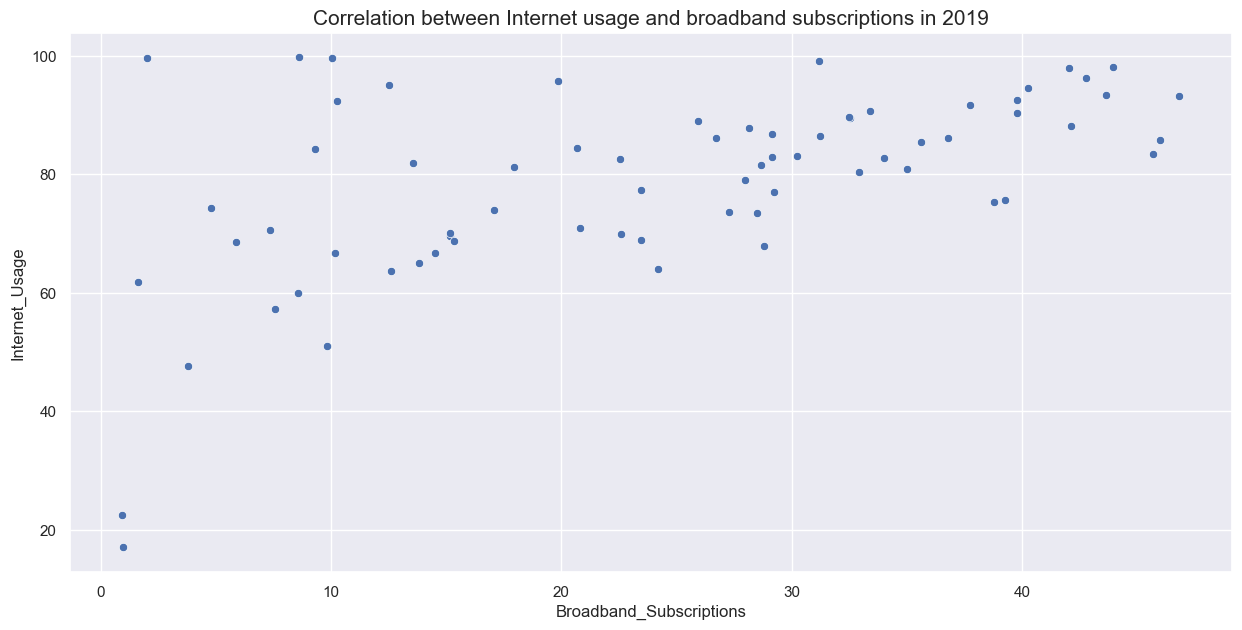

In [219]:
plt.figure(figsize=(15, 7))
plt.title('Correlation between Internet usage and broadband subscriptions in 2019',fontsize=15);
sns.scatterplot(x = 'Broadband_Subscriptions',y = 'Internet_Usage', data = corr_df );



In [220]:
corr_df.corr()

,Broadband_Subscriptions,Internet_Usage
Broadband_Subscriptions,1.000000,0.559008
Internet_Usage,0.559008,1.000000


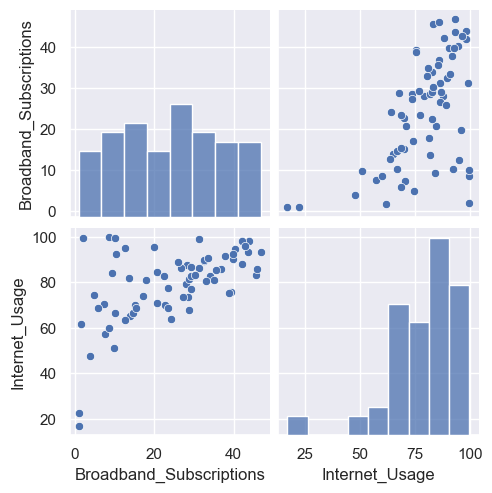

In [221]:
sns.pairplot(corr_df);

### The correlation between Internet usage and broadband subscriptions in 2019 is quite strong and is equal to 0.56. The graph shows us that with the increase in the number of Internet users, the number of broadband Internet subscriptions is also growing

## Let's summarize the results

#### We see that in developed countries, the boom in Internet development occurred in 1997 and active growth up to 2007, and this can be clearly seen on the charts. In African countries, everything happens with about a ten-year delay.

#### With the development of technology, the development of the Internet is also taking place, and as a result, the number of connected subscribers is growing, further as we found out that with the growth of users, the number of broadband Internet subscriptions is also growing. According to the number of users, it is obvious that among the leaders there will be countries with a large number of inhabitants such as China and India. According to the level of digitalization, the results are also clear that developed and small countries have a very high level of Internet (in terms of population share).

#### On my own behalf, I want to add that even despite some misunderstanding in question No. 3, with which I had to additionally search for information and the composition of certain regions, because of which I had a feeling of incomplete completion of the task (due to lack of feedback), I liked the work and was interesting.

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.